In [5]:
# Standard library imports
import os
import sys
from pathlib import Path
from typing import List, Tuple, Dict, Optional, Union

# Data analysis libraries
import numpy as np
import pandas as pd
import xarray as xr

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)

"""
Weather Data Distribution Analysis
==================================

This notebook analyzes the distribution of weather variables in ERA5 reanalysis data.
It includes the following analyses:
1. Global distribution of variables (histograms and basic statistics)
2. Spatial distribution maps of variables at specific time points
3. Temporal patterns of variables at specific spatial points

The weather variables analyzed include:
- d2m: 2-meter dewpoint temperature
- u: U-component of wind
- v: V-component of wind
- msl: Mean sea level pressure
- r: Relative humidity

The notebook uses standardized data processing to ensure comparability across variables.
"""

'\nWeather Data Distribution Analysis\n==================================\n\nThis notebook analyzes the distribution of weather variables in ERA5 reanalysis data.\nIt includes the following analyses:\n1. Global distribution of variables (histograms and basic statistics)\n2. Spatial distribution maps of variables at specific time points\n3. Temporal patterns of variables at specific spatial points\n\nThe weather variables analyzed include:\n- d2m: 2-meter dewpoint temperature\n- u: U-component of wind\n- v: V-component of wind\n- msl: Mean sea level pressure\n- r: Relative humidity\n\nThe notebook uses standardized data processing to ensure comparability across variables.\n'

In [6]:
def setup_environment() -> str:
    """
    Set up the project environment by navigating to the project root directory
    and configuring necessary paths.
    
    Returns:
        str: The current working directory
    """
    try:
        # Navigate to project root directory
        os.chdir("../")
    except Exception as e:
        print(f"Error changing directory: {e}")
    
    # Get and display current working directory
    current_directory = os.getcwd()
    print(f"Working directory: {current_directory}")
    
    return current_directory

# Set up environment
current_dir = setup_environment()

# Import project utilities
from utils.utils import load_json_config
from utils.utils_data import read_netcdf_raw

# Display the Python version for reproducibility
print(f"Python version: {sys.version}")


Working directory: /home/yuhan/Desktop/Master
Python version: 3.11.6 | packaged by conda-forge | (main, Oct  3 2023, 10:40:35) [GCC 12.3.0]


## Data Processing and Environment Setup

This section sets up the environment and loads the required data for analysis.

## Basic Process

### Load Data


In [7]:

def generate_file_path(
    variables: str,
    frequency: int,
    time_unit: str,
    method: str,
    preprocessing: str,
    year_range: Tuple[int, int],
    weighted: bool = True
) -> str:
    """
    Generate file path for the processed data based on given parameters.
    
    Args:
        variables: String representing variables (e.g., 'd2muvmslr')
        frequency: Temporal frequency (e.g., 3)
        time_unit: Time unit ('h' for hours, 'd' for days)
        method: Resampling method (e.g., 'none', 'mean')
        preprocessing: Preprocessing method (e.g., 'log', 'standardized')
        year_range: Tuple of start and end years
        weighted: Whether to use weighted data
        
    Returns:
        str: Path to the processed data file
    """
    # Validate inputs
    if not isinstance(variables, str) or not variables:
        raise ValueError("Variables must be a non-empty string")
    
    if not isinstance(frequency, int) or frequency <= 0:
        raise ValueError("Frequency must be a positive integer")
    
    if time_unit not in ['h', 'd']:
        raise ValueError("Time unit must be 'h' for hours or 'd' for days")
    
    if method not in ['none', 'mean', 'sum']:
        raise ValueError("Method must be 'none', 'mean', or 'sum'")
    
    if preprocessing not in ['log', 'standardized', 'normalized', 'raw']:
        raise ValueError("Preprocessing must be 'log', 'standardized', 'normalized', or 'raw'")
    
    if not isinstance(year_range, tuple) or len(year_range) != 2:
        raise ValueError("Year range must be a tuple of (start_year, end_year)")
    
    # Generate the file path with appropriate suffix
    weighted_suffix = "_weighted" if weighted else ""
    return f"data/processed/{variables}_{frequency}{time_unit}_{method}_{preprocessing}_{year_range[0]}{year_range[1]}{weighted_suffix}.h5"

def load_weather_data(file_path: str) -> xr.Dataset:
    """
    Load weather data from the specified file path.
    
    Args:
        file_path: Path to the data file
        
    Returns:
        xr.Dataset: Loaded weather data
    """
    print(f"Loading data from: {file_path}")
    
    # Check if file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Data file not found: {file_path}")
    
    try:
        data = read_netcdf_raw(file_path)
        print(f"Data loaded successfully. Dimensions: {dict(data.dims)}")
        print(f"Variables: {list(data.data_vars)}")
        
        # Print memory usage if possible
        try:
            memory_usage = data.nbytes / (1024 ** 2)  # Convert to MB
            print(f"Approximate memory usage: {memory_usage:.2f} MB")
        except:
            pass
            
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        raise

# Define data parameters
variables = "d2muvmslr"
variable_list = ["d2m", "u", "v", "msl", "r"]
selected_frequency = 3
time_unit = "h"
resample_method = "none"
preprocessing_method = "log"
year_range = (2001, 2020)

# Generate file path and load data
try:
    variables_path = generate_file_path(
        variables=variables,
        frequency=selected_frequency,
        time_unit=time_unit,
        method=resample_method,
        preprocessing=preprocessing_method,
        year_range=year_range
    )

    # Load the weather data
    all_variables_data = load_weather_data(variables_path)
    
    # Print dataset summary
    print("\nDataset Summary:")
    print(f"Time period: {all_variables_data.time.values[0]} to {all_variables_data.time.values[-1]}")
    print(f"Number of time steps: {len(all_variables_data.time)}")
    if 'x' in all_variables_data.dims and 'y' in all_variables_data.dims:
        print(f"Spatial dimensions: {all_variables_data.y.shape[0]} x {all_variables_data.x.shape[0]}")
    
except Exception as e:
    print(f"Error during data loading process: {e}")
    # Provide fallback options
    print("Please check the data file path and parameters, or try with a different configuration.")

Loading data from: data/processed/d2muvmslr_3h_none_log_20012020_weighted.h5
Data loaded successfully. Dimensions: {'time': 58440, 'channel': 5, 'y': 32, 'x': 32}
Variables: ['__xarray_dataarray_variable__']
Approximate memory usage: 2283.26 MB

Dataset Summary:
Time period: 2001-01-01T00:00:00.000000000 to 2020-12-31T21:00:00.000000000
Number of time steps: 58440
Spatial dimensions: 32 x 32


/tmp/ipykernel_252445/4006727787.py:66: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"Data loaded successfully. Dimensions: {dict(data.dims)}")


### Flatten and Plot Distribution (Global)


/home/yuhan/Desktop/Master/conda_master_v0/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/yuhan/Desktop/Master/conda_master_v0/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/yuhan/Desktop/Master/conda_master_v0/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/yuhan/Desktop/Master/conda_master_v0/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

Figure saved to: results/3_1_distribution_weighted.png

Variable Statistics:

Variable Statistics:


,mean,std,min,max,median,25%,75%,skewness,kurtosis
d2m,0.0,1.0,-1.2163,4.1687,-0.2893,-0.7331,0.3833,1.4508,1.9535
u,0.0,1.0,-7.7464,9.2824,-0.1997,-0.5053,0.3601,1.2261,4.9261
v,0.0,1.0,-8.5296,9.6859,-0.0587,-0.4336,0.3868,0.4644,5.1806
msl,0.0,1.0,-1.2147,4.1236,-0.2901,-0.7321,0.3814,1.4550,1.9645
r,0.0,1.0,-1.1310,6.5050,-0.3469,-0.7008,0.3577,1.9170,4.3083


Statistics saved to: results/variable_statistics.csv


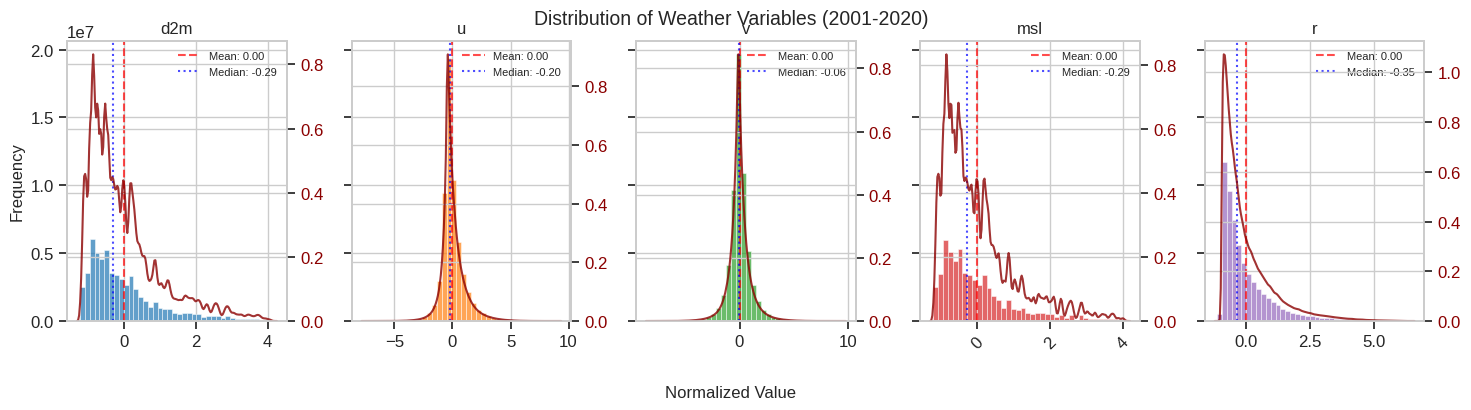

In [8]:
def plot_variable_distributions(
    data: xr.Dataset,
    variable_names: List[str],
    figsize: Tuple[int, int] = (12, 3),
    bins: int = 30,
    output_path: Optional[str] = None,
    dpi: int = 300,
    colors: Optional[List[str]] = None,
    kde: bool = False
) -> Tuple[plt.Figure, np.ndarray]:
    """
    Create distribution plots for each weather variable.
    
    Args:
        data: Dataset containing the variables
        variable_names: List of variable names to plot
        figsize: Figure size (width, height)
        bins: Number of histogram bins
        output_path: Path to save the figure (None for no saving)
        dpi: Resolution for saved figure
        colors: List of colors for each variable (defaults to matplotlib colors)
        kde: Whether to overlay kernel density estimate
        
    Returns:
        Tuple of Figure and Axes objects
    """
    # Validate inputs
    if len(variable_names) == 0:
        raise ValueError("At least one variable name must be provided")
    
    if not all(name in data.dims or name == '__xarray_dataarray_variable__' for name in ['channel', 'time']):
        print("Warning: Dataset might not have the expected dimensions ('channel', 'time')")
    
    # Set default colors if not provided
    if colors is None:
        colors = [f'C{i}' for i in range(len(variable_names))]
    elif len(colors) < len(variable_names):
        colors = colors + [f'C{i}' for i in range(len(colors), len(variable_names))]
    
    # Create figure and axes
    fig, axes = plt.subplots(1, len(variable_names), figsize=figsize, sharey=True, facecolor='none')
    
    # Handle single variable case
    if len(variable_names) == 1:
        axes = np.array([axes])
    
    # Plot histogram for each variable
    for i, ax in enumerate(axes.flatten()):
        try:
            # Extract the current variable's data
            data_variable = data['__xarray_dataarray_variable__'].isel(channel=i)
            
            # Plot histogram with custom styling
            hist = data_variable.plot.hist(
                bins=bins, 
                ax=ax, 
                color=colors[i], 
                alpha=0.7,
                edgecolor='white',
                linewidth=0.5
            )
            
            # Add KDE if requested
            if kde:
                # Create a twin axes for the KDE plot
                ax2 = ax.twinx()
                
                # Convert xarray to numpy array for seaborn KDE
                data_values = data_variable.values.flatten()
                sns.kdeplot(data_values, ax=ax2, color='darkred', linewidth=1.5, alpha=0.8)
                
                # Remove y-axis labels from the KDE plot to avoid confusion
                ax2.set_ylabel('')
                ax2.tick_params(axis='y', labelcolor='darkred')
            
            # Add statistics to the plot
            mean_val = float(data_variable.mean().values)
            std_val = float(data_variable.std().values)
            median_val = float(data_variable.median().values)
            
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, 
                       label=f'Mean: {mean_val:.2f}')
            ax.axvline(median_val, color='blue', linestyle=':', alpha=0.7, 
                      label=f'Median: {median_val:.2f}')
            
            # Set labels and title
            ax.set_title(f'{variable_names[i]}', fontsize=12)
            ax.set_xlabel('', fontsize=10)
            
            # Add legend
            ax.legend(loc='upper right', fontsize=8)
            
            # Only show y-axis label on the first subplot
            if i == 0:
                ax.set_ylabel('Frequency', fontsize=12)
            
            # Rotate x-axis labels for better readability if needed
            if variable_names[i] == 'msl':
                ax.tick_params(axis='x', rotation=45)
                
        except Exception as e:
            print(f"Error plotting variable {variable_names[i]}: {e}")
            ax.text(0.5, 0.5, f"Error plotting {variable_names[i]}", 
                    ha='center', va='center', transform=ax.transAxes)
    
    # Add common x-axis label
    fig.text(0.5, 0.01, 'Normalized Value', ha='center', fontsize=12)
    
    # Add a figure title with dataset information
    plt.suptitle(f'Distribution of Weather Variables ({year_range[0]}-{year_range[1]})', 
                 fontsize=14, y=0.98)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2, top=0.9)
    
    # Save figure if output path is provided
    if output_path:
        # Ensure directory exists
        os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
        plt.savefig(output_path, dpi=dpi, bbox_inches='tight', transparent=False)
        print(f"Figure saved to: {output_path}")
    
    return fig, axes

def analyze_variable_statistics(data: xr.Dataset, variable_names: List[str]) -> pd.DataFrame:
    """
    Calculate and return basic statistics for each variable.
    
    Args:
        data: Dataset containing the variables
        variable_names: List of variable names to analyze
        
    Returns:
        pd.DataFrame: DataFrame with statistics for each variable
    """
    stats_dict = {}
    
    for i, var_name in enumerate(variable_names):
        try:
            data_variable = data['__xarray_dataarray_variable__'].isel(channel=i)
            
            # Basic statistics
            stats_dict[var_name] = {
                'mean': float(data_variable.mean().values),
                'std': float(data_variable.std().values),
                'min': float(data_variable.min().values),
                'max': float(data_variable.max().values),
                'median': float(data_variable.median().values),
                '25%': float(np.percentile(data_variable.values, 25)),
                '75%': float(np.percentile(data_variable.values, 75)),
                'skewness': float(((data_variable - data_variable.mean()) ** 3).mean() / 
                               (data_variable.std() ** 3)),
                'kurtosis': float(((data_variable - data_variable.mean()) ** 4).mean() / 
                               (data_variable.std() ** 4) - 3)
            }
        except Exception as e:
            print(f"Error calculating statistics for {var_name}: {e}")
            stats_dict[var_name] = {'error': str(e)}
    
    # Create DataFrame and transpose for better display
    stats_df = pd.DataFrame(stats_dict).T
    
    # Round values for better readability
    if not stats_df.empty and not all('error' in stats for stats in stats_dict.values()):
        stats_df = stats_df.round(4)
    
    return stats_df

# Plot distributions for all variables
try:
    fig, axes = plot_variable_distributions(
        data=all_variables_data,
        variable_names=variable_list,
        figsize=(15, 4),  # Slightly wider for better visibility
        bins=40,  # More bins for finer detail
        output_path='results/3_1_distribution_weighted.png',
        kde=True  # Add KDE overlay
    )

    # Display basic statistics
    variable_stats = analyze_variable_statistics(all_variables_data, variable_list)
    print("\nVariable Statistics:")
    display(variable_stats)
    
    # Save statistics to CSV
    stats_path = 'results/variable_statistics.csv'
    variable_stats.to_csv(stats_path)
    print(f"Statistics saved to: {stats_path}")
    
except Exception as e:
    print(f"Error in distribution analysis: {e}")


## Spatial Distribution Analysis

Spatial distribution plot saved to: results/spatial_distribution_d2m.png
Spatial distribution plot saved to: results/spatial_distribution_d2m_mean.png
Multiple spatial distributions plot saved to: results/spatial_distribution_d2m_multi.png


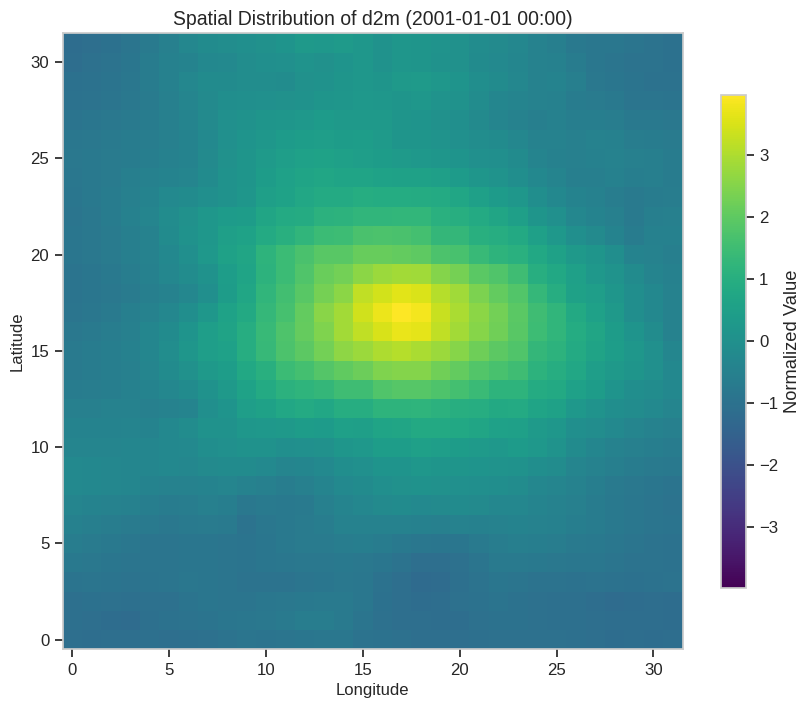

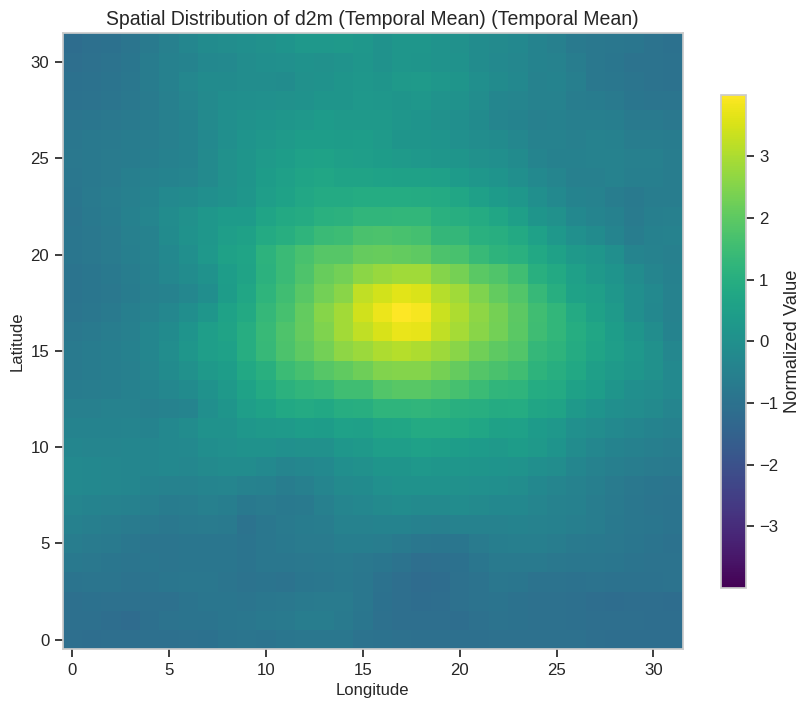

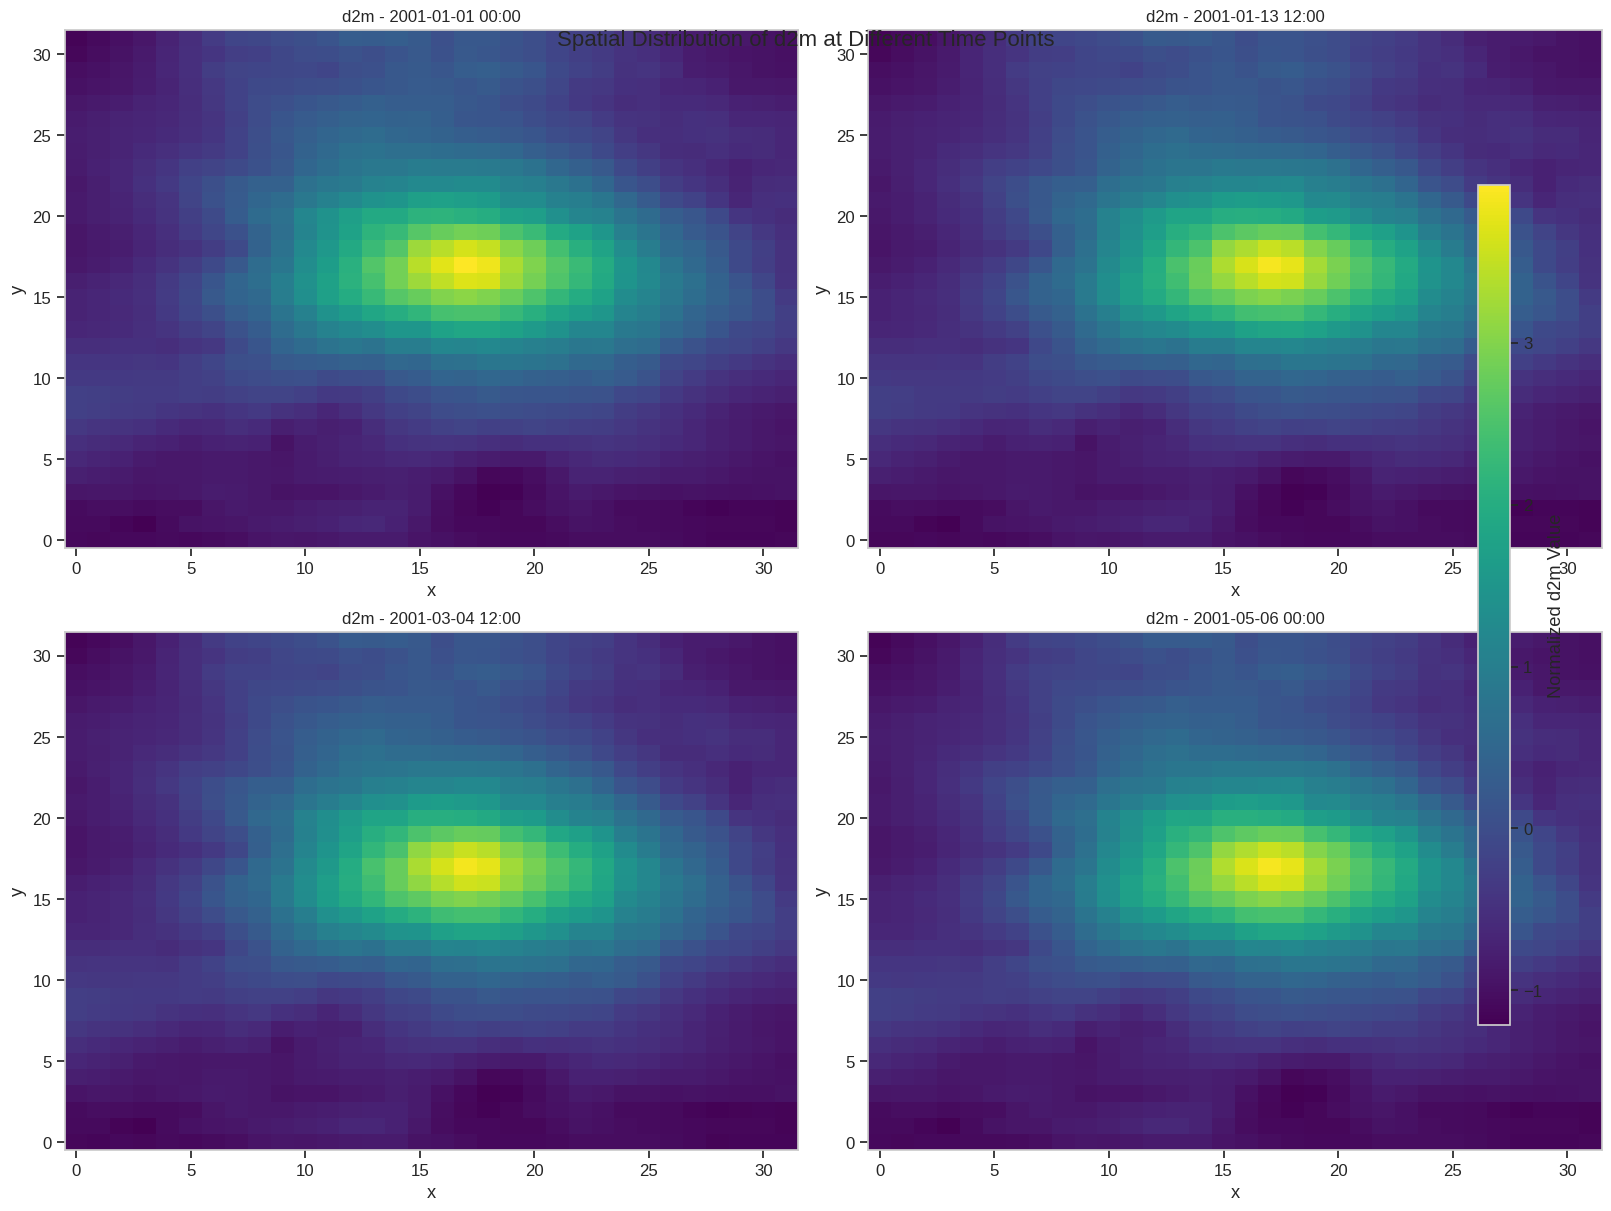

In [9]:
def plot_spatial_distribution(
    data: xr.Dataset,
    variable_idx: int,
    time_idx: Optional[int] = 0,
    figsize: Tuple[int, int] = (10, 8),
    cmap: str = 'viridis',
    output_path: Optional[str] = None,
    title_suffix: str = "",
    show_time: bool = True
) -> Tuple[plt.Figure, plt.Axes]:
    """
    Plot the spatial distribution of a variable at a specific time point.
    
    Args:
        data: Dataset containing the variables
        variable_idx: Index of the variable to plot
        time_idx: Index of the time point to plot (None for temporal mean)
        figsize: Figure size (width, height)
        cmap: Colormap to use
        output_path: Path to save the figure (None for no saving)
        title_suffix: Additional text to add to the title
        show_time: Whether to include timestamp in title
        
    Returns:
        Tuple of Figure and Axes objects
    """
    # Validate inputs
    if not 0 <= variable_idx < len(variable_list):
        raise ValueError(f"Variable index must be between 0 and {len(variable_list)-1}")
    
    if time_idx is not None and time_idx < 0:
        raise ValueError("Time index must be non-negative")
    
    # Extract the data for the specified variable
    if time_idx is not None:
        # Extract data for a specific time point
        if time_idx >= len(data.time):
            raise ValueError(f"Time index {time_idx} out of range (max: {len(data.time)-1})")
        
        var_data = data['__xarray_dataarray_variable__'].isel(time=time_idx, channel=variable_idx)
        time_label = pd.to_datetime(data.time.values[time_idx]).strftime('%Y-%m-%d %H:%M')
    else:
        # Calculate temporal mean
        var_data = data['__xarray_dataarray_variable__'].isel(channel=variable_idx).mean(dim='time')
        time_label = "Temporal Mean"
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot the spatial distribution
    im = var_data.plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=True,
        cbar_kwargs={'label': f'Normalized Value', 'shrink': 0.8},
    )
    
    # Set title and labels
    title = f'Spatial Distribution of {variable_list[variable_idx]}'
    if show_time:
        title += f' ({time_label})'
    if title_suffix:
        title += f' {title_suffix}'
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Save figure if output path is provided
    if output_path:
        # Ensure directory exists
        os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Spatial distribution plot saved to: {output_path}")
    
    return fig, ax

def plot_multiple_spatial_distributions(
    data: xr.Dataset,
    time_indices: List[int] = [0, 100, 200, 300],
    variable_idx: int = 0,
    figsize: Tuple[int, int] = (16, 12),
    cmap: str = 'viridis',
    output_path: Optional[str] = None
) -> plt.Figure:
    """
    Plot multiple spatial distributions of a variable at different time points.
    
    Args:
        data: Dataset containing the variables
        time_indices: List of time indices to plot
        variable_idx: Index of the variable to plot
        figsize: Figure size (width, height)
        cmap: Colormap to use
        output_path: Path to save the figure (None for no saving)
        
    Returns:
        Figure object
    """
    n_plots = len(time_indices)
    rows = int(np.ceil(n_plots / 2))
    cols = min(n_plots, 2)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
    
    # Handle single axis case
    if n_plots == 1:
        axes = np.array([axes])
    
    # Flatten axes for easy iteration
    axes = axes.flatten()
    
    # Common vmin and vmax for consistent color scale
    all_data = []
    for time_idx in time_indices:
        all_data.append(
            data['__xarray_dataarray_variable__'].isel(time=time_idx, channel=variable_idx).values
        )
    
    vmin = min(np.min(arr) for arr in all_data)
    vmax = max(np.max(arr) for arr in all_data)
    
    # Plot each time point
    for i, time_idx in enumerate(time_indices):
        if i < len(axes):
            ax = axes[i]
            var_data = data['__xarray_dataarray_variable__'].isel(time=time_idx, channel=variable_idx)
            time_label = pd.to_datetime(data.time.values[time_idx]).strftime('%Y-%m-%d %H:%M')
            
            im = var_data.plot(
                ax=ax,
                cmap=cmap,
                add_colorbar=False,
                vmin=vmin,
                vmax=vmax
            )
            
            ax.set_title(f'{variable_list[variable_idx]} - {time_label}', fontsize=12)
            ax.grid(True, linestyle='--', alpha=0.5)
    
    # Add a common colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label(f'Normalized {variable_list[variable_idx]} Value')
    
    # Set a common title
    fig.suptitle(f'Spatial Distribution of {variable_list[variable_idx]} at Different Time Points', 
                fontsize=16, y=0.98)
    
    # Save figure if output path is provided
    if output_path:
        os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Multiple spatial distributions plot saved to: {output_path}")
    
    return fig

# Demonstrate spatial analysis for the first variable (if spatial dimensions exist)
try:
    # Check if the data has spatial dimensions
    if 'x' in all_variables_data.dims and 'y' in all_variables_data.dims:
        # Plot spatial distribution for the first variable at a specific time point
        fig_single, ax_single = plot_spatial_distribution(
            data=all_variables_data,
            variable_idx=0,  # First variable (d2m)
            time_idx=0,  # First time point
            output_path='results/spatial_distribution_d2m.png'
        )
        
        # Plot temporal mean spatial distribution
        fig_mean, ax_mean = plot_spatial_distribution(
            data=all_variables_data,
            variable_idx=0,  # First variable (d2m)
            time_idx=None,  # Temporal mean
            output_path='results/spatial_distribution_d2m_mean.png',
            title_suffix="(Temporal Mean)"
        )
        
        # Plot multiple time points to show variation
        sample_times = [0, 100, 500, 1000]  # Sample time indices
        fig_multi = plot_multiple_spatial_distributions(
            data=all_variables_data,
            time_indices=sample_times,
            variable_idx=0,  # First variable (d2m)
            output_path='results/spatial_distribution_d2m_multi.png'
        )
    else:
        print("Data does not contain spatial dimensions (x, y) for plotting")
except Exception as e:
    print(f"Error plotting spatial distribution: {e}")
    import traceback
    traceback.print_exc()

## Temporal Pattern Analysis

/tmp/ipykernel_252445/469734088.py:33: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if 'y' in data.dims and (y < 0 or y >= data.dims['y']):
/tmp/ipykernel_252445/469734088.py:36: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if 'x' in data.dims and (x < 0 or x >= data.dims['x']):


Temporal pattern plot saved to: results/temporal_pattern_d2m.png


/tmp/ipykernel_252445/469734088.py:139: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if 'y' in data.dims and (y < 0 or y >= data.dims['y']):
/tmp/ipykernel_252445/469734088.py:142: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if 'x' in data.dims and (x < 0 or x >= data.dims['x']):


Variable comparison plot saved to: results/variable_comparison_over_time.png


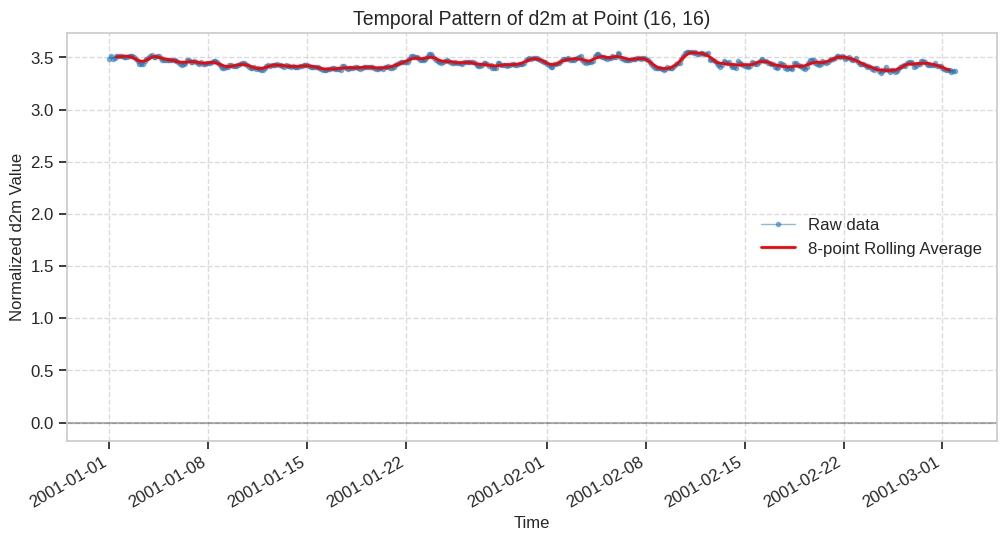

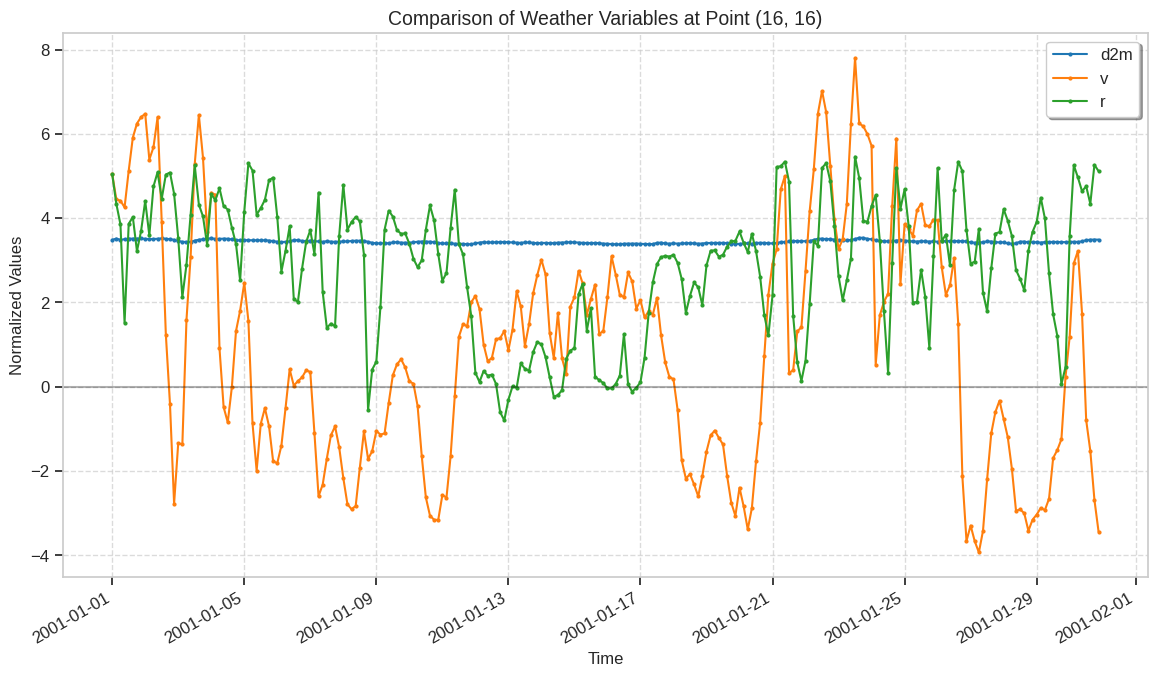

In [10]:
def plot_temporal_patterns(
    data: xr.Dataset,
    variable_idx: int,
    spatial_point: Tuple[int, int] = (16, 16),  # Center point (y, x)
    n_days: int = 30,
    figsize: Tuple[int, int] = (12, 6),
    output_path: Optional[str] = None,
    rolling_window: Optional[int] = None
) -> Tuple[plt.Figure, plt.Axes]:
    """
    Plot the temporal pattern of a variable at a specific spatial point.
    
    Args:
        data: Dataset containing the variables
        variable_idx: Index of the variable to plot
        spatial_point: Tuple of (y, x) coordinates for the spatial point
        n_days: Number of days to plot
        figsize: Figure size (width, height)
        output_path: Path to save the figure (None for no saving)
        rolling_window: Window size for rolling average (None for no smoothing)
        
    Returns:
        Tuple of Figure and Axes objects
    """
    # Validate inputs
    if not 0 <= variable_idx < len(variable_list):
        raise ValueError(f"Variable index must be between 0 and {len(variable_list)-1}")
    
    # Extract time series for the specified variable and spatial point
    y, x = spatial_point
    
    # Validate spatial coordinates
    if 'y' in data.dims and (y < 0 or y >= data.dims['y']):
        raise ValueError(f"Y coordinate {y} out of range (0-{data.dims['y']-1})")
    
    if 'x' in data.dims and (x < 0 or x >= data.dims['x']):
        raise ValueError(f"X coordinate {x} out of range (0-{data.dims['x']-1})")
    
    var_data = data['__xarray_dataarray_variable__'].isel(channel=variable_idx, y=y, x=x)
    
    # Limit to specified number of days (assuming data is 3-hourly)
    points_per_day = 24 // selected_frequency
    time_points = min(n_days * points_per_day, len(var_data.time))
    var_data = var_data.isel(time=slice(0, time_points))
    
    # Convert time to datetime if it's not already
    if not np.issubdtype(var_data.time.dtype, np.datetime64):
        try:
            var_data['time'] = pd.to_datetime(var_data.time.values)
        except Exception as e:
            print(f"Warning: Could not convert time to datetime format: {e}")
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create a pandas Series for easier manipulation
    time_index = pd.to_datetime(var_data.time.values)
    series = pd.Series(var_data.values, index=time_index)
    
    # Plot raw time series
    ax.plot(
        series.index, 
        series.values,
        marker='o',
        markersize=3,
        linestyle='-',
        linewidth=1,
        alpha=0.5,
        label='Raw data'
    )
    
    # Add rolling average if requested
    if rolling_window is not None and rolling_window > 1:
        rolling_avg = series.rolling(window=rolling_window, center=True).mean()
        ax.plot(
            rolling_avg.index,
            rolling_avg.values,
            color='red',
            linewidth=2,
            label=f'{rolling_window}-point Rolling Average'
        )
        
    # Set title and labels
    ax.set_title(f'Temporal Pattern of {variable_list[variable_idx]} at Point ({x}, {y})', fontsize=14)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel(f'Normalized {variable_list[variable_idx]} Value', fontsize=12)
    
    # Add grid and legend
    ax.grid(True, linestyle='--', alpha=0.7)
    if rolling_window is not None:
        ax.legend(loc='best')
    
    # Format x-axis date labels
    fig.autofmt_xdate()
    
    # Add horizontal line at y=0 for reference
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Save figure if output path is provided
    if output_path:
        # Ensure directory exists
        os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Temporal pattern plot saved to: {output_path}")
    
    return fig, ax

def plot_variable_comparison_over_time(
    data: xr.Dataset,
    variable_indices: List[int],
    spatial_point: Tuple[int, int] = (16, 16),
    n_days: int = 30,
    figsize: Tuple[int, int] = (14, 8),
    output_path: Optional[str] = None
) -> Tuple[plt.Figure, plt.Axes]:
    """
    Plot multiple variables over time at the same spatial point for comparison.
    
    Args:
        data: Dataset containing the variables
        variable_indices: List of indices of the variables to plot
        spatial_point: Tuple of (y, x) coordinates for the spatial point
        n_days: Number of days to plot
        figsize: Figure size (width, height)
        output_path: Path to save the figure (None for no saving)
        
    Returns:
        Tuple of Figure and Axes objects
    """
    # Validate inputs
    for idx in variable_indices:
        if not 0 <= idx < len(variable_list):
            raise ValueError(f"Variable index {idx} out of range (0-{len(variable_list)-1})")
    
    # Extract time series for the specified variables and spatial point
    y, x = spatial_point
    
    # Validate spatial coordinates
    if 'y' in data.dims and (y < 0 or y >= data.dims['y']):
        raise ValueError(f"Y coordinate {y} out of range (0-{data.dims['y']-1})")
    
    if 'x' in data.dims and (x < 0 or x >= data.dims['x']):
        raise ValueError(f"X coordinate {x} out of range (0-{data.dims['x']-1})")
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Limit to specified number of days
    points_per_day = 24 // selected_frequency
    time_points = min(n_days * points_per_day, len(data.time))
    
    # Plot each variable
    for idx in variable_indices:
        var_data = data['__xarray_dataarray_variable__'].isel(
            channel=idx, y=y, x=x, time=slice(0, time_points)
        )
        
        # Create a pandas Series
        time_index = pd.to_datetime(var_data.time.values)
        series = pd.Series(var_data.values, index=time_index)
        
        # Plot the time series
        ax.plot(
            series.index, 
            series.values,
            marker='.',
            markersize=4,
            linewidth=1.5,
            label=variable_list[idx]
        )
    
    # Set title and labels
    ax.set_title(f'Comparison of Weather Variables at Point ({x}, {y})', fontsize=14)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Normalized Values', fontsize=12)
    
    # Add grid and legend
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='best', frameon=True, fancybox=True, shadow=True)
    
    # Format x-axis date labels
    fig.autofmt_xdate()
    
    # Add horizontal line at y=0 for reference
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Save figure if output path is provided
    if output_path:
        os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Variable comparison plot saved to: {output_path}")
    
    return fig, ax

# Demonstrate temporal analysis
try:
    # Plot temporal pattern for a single variable with rolling average
    fig_temporal, ax_temporal = plot_temporal_patterns(
        data=all_variables_data,
        variable_idx=0,  # First variable (d2m)
        n_days=60,  # Show 60 days for better pattern visibility
        rolling_window=8,  # 24-hour rolling average (8 points at 3-hour frequency)
        output_path='results/temporal_pattern_d2m.png'
    )
    
    # Plot comparison of multiple variables
    fig_comparison, ax_comparison = plot_variable_comparison_over_time(
        data=all_variables_data,
        variable_indices=[0, 2, 4],  # d2m, v, r
        n_days=30,
        output_path='results/variable_comparison_over_time.png'
    )
    
except Exception as e:
    print(f"Error plotting temporal pattern: {e}")
    import traceback
    traceback.print_exc()

## Correlation Analysis

Exploring the correlations between different weather variables can provide valuable insights into their relationships and interdependencies.

Correlation heatmap saved to: results/correlation_pearson.png
Correlation heatmap saved to: results/correlation_spearman.png

Pearson Correlation Matrix:


,d2m,u,v,msl,r
d2m,1.00,0.17,0.32,-0.06,0.21
u,0.17,1.00,0.18,-0.34,0.19
v,0.32,0.18,1.00,-0.32,0.24
msl,-0.06,-0.34,-0.32,1.00,-0.52
r,0.21,0.19,0.24,-0.52,1.00



Spearman Correlation Matrix:


,d2m,u,v,msl,r
d2m,1.00,0.14,0.32,-0.08,0.20
u,0.14,1.00,0.18,-0.34,0.18
v,0.32,0.18,1.00,-0.33,0.24
msl,-0.08,-0.34,-0.33,1.00,-0.53
r,0.20,0.18,0.24,-0.53,1.00


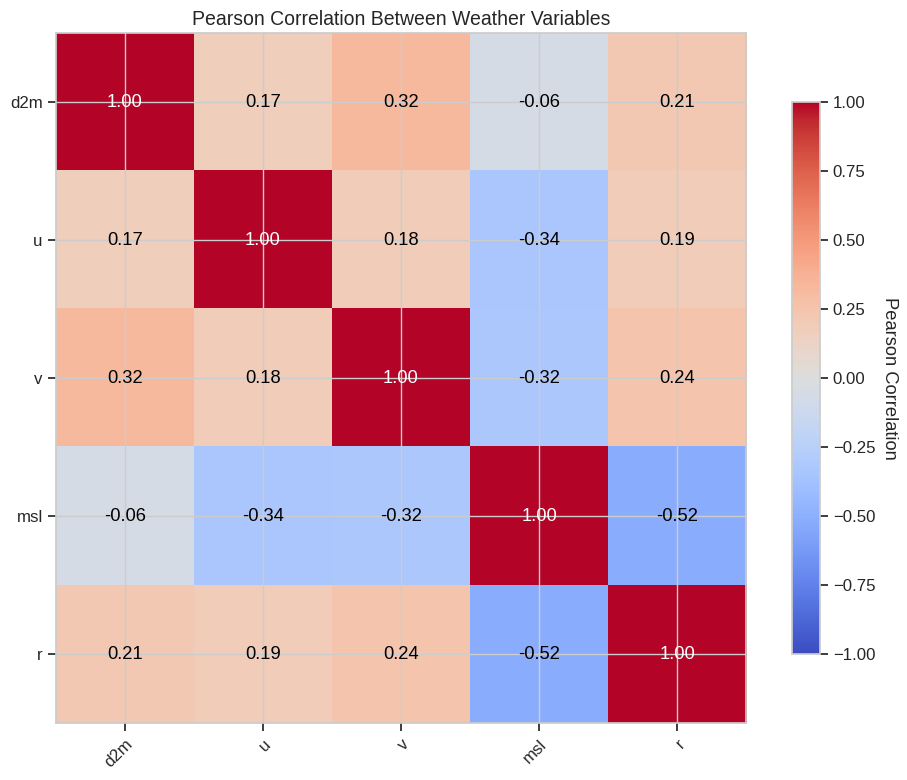

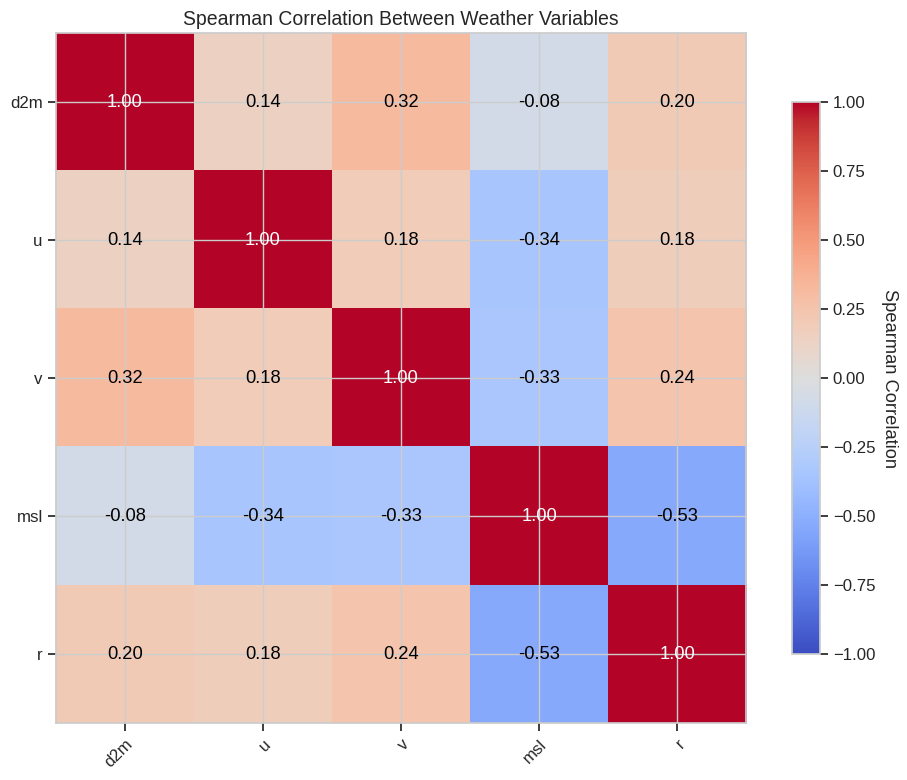

In [11]:
def calculate_and_plot_correlations(
    data: xr.Dataset,
    variable_names: List[str],
    figsize: Tuple[int, int] = (10, 8),
    method: str = 'pearson',
    output_path: Optional[str] = None,
    cmap: str = 'coolwarm',
    dpi: int = 300
) -> Tuple[pd.DataFrame, plt.Figure]:
    """
    Calculate and plot correlations between weather variables.
    
    Args:
        data: Dataset containing the variables
        variable_names: List of variable names to analyze
        figsize: Figure size (width, height)
        method: Correlation method ('pearson', 'spearman', or 'kendall')
        output_path: Path to save the figure (None for no saving)
        cmap: Colormap for the heatmap
        dpi: Resolution for saved figure
        
    Returns:
        Tuple of correlation DataFrame and Figure object
    """
    # Create empty DataFrame to store variable data
    var_data_dict = {}
    
    # Extract data for each variable
    for i, var_name in enumerate(variable_names):
        data_variable = data['__xarray_dataarray_variable__'].isel(channel=i)
        # Flatten spatial dimensions and keep time dimension
        if 'x' in data_variable.dims and 'y' in data_variable.dims:
            # Average over spatial dimensions for a single time series
            var_data_dict[var_name] = data_variable.mean(dim=['x', 'y']).values
        else:
            var_data_dict[var_name] = data_variable.values
    
    # Create DataFrame from the data
    df = pd.DataFrame(var_data_dict)
    
    # Calculate correlation matrix
    corr_matrix = df.corr(method=method)
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot correlation heatmap
    im = ax.imshow(corr_matrix, cmap=cmap, vmin=-1, vmax=1)
    
    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
    cbar.ax.set_ylabel(f'{method.capitalize()} Correlation', rotation=-90, va="bottom")
    
    # Set ticks and labels
    ax.set_xticks(np.arange(len(variable_names)))
    ax.set_yticks(np.arange(len(variable_names)))
    ax.set_xticklabels(variable_names)
    ax.set_yticklabels(variable_names)
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add correlation values to the heatmap
    for i in range(len(variable_names)):
        for j in range(len(variable_names)):
            text = ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                          ha="center", va="center", color="black" if abs(corr_matrix.iloc[i, j]) < 0.7 else "white")
    
    # Set title
    ax.set_title(f"{method.capitalize()} Correlation Between Weather Variables", fontsize=14)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save figure if output path is provided
    if output_path:
        os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
        plt.savefig(output_path, dpi=dpi, bbox_inches='tight')
        print(f"Correlation heatmap saved to: {output_path}")
    
    return corr_matrix, fig

# Calculate and plot correlations between variables
try:
    # Pearson correlation (linear relationship)
    corr_pearson, fig_pearson = calculate_and_plot_correlations(
        data=all_variables_data,
        variable_names=variable_list,
        method='pearson',
        output_path='results/correlation_pearson.png'
    )
    
    # Spearman correlation (monotonic relationship)
    corr_spearman, fig_spearman = calculate_and_plot_correlations(
        data=all_variables_data,
        variable_names=variable_list,
        method='spearman',
        output_path='results/correlation_spearman.png'
    )
    
    # Display correlation matrices
    print("\nPearson Correlation Matrix:")
    display(corr_pearson.round(2))
    
    print("\nSpearman Correlation Matrix:")
    display(corr_spearman.round(2))
    
except Exception as e:
    print(f"Error calculating correlations: {e}")
    import traceback
    traceback.print_exc()

## Seasonality and Periodicity Analysis

Analyzing the seasonality and periodicity of weather variables can reveal important temporal patterns and cycles.

Error in seasonality analysis: 'SeriesGroupBy' object has no attribute 'boxplot'


Traceback (most recent call last):
  File "/tmp/ipykernel_252445/3466915947.py", line 150, in <module>
    fig_seasonality = plot_seasonality(
                      ^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_252445/3466915947.py", line 56, in plot_seasonality
    monthly_data.boxplot(ax=ax1)
    ^^^^^^^^^^^^^^^^^^^^
  File "/home/yuhan/Desktop/Master/conda_master_v0/lib/python3.11/site-packages/pandas/core/groupby/groupby.py", line 1363, in __getattr__
    raise AttributeError(
AttributeError: 'SeriesGroupBy' object has no attribute 'boxplot'


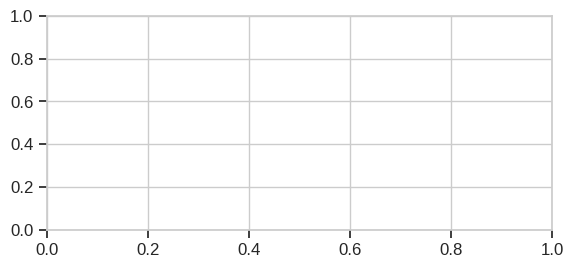

In [12]:
def plot_seasonality(
    data: xr.Dataset,
    variable_idx: int,
    spatial_point: Tuple[int, int] = (16, 16),
    figsize: Tuple[int, int] = (15, 10),
    output_path: Optional[str] = None
) -> plt.Figure:
    """
    Plot seasonality analysis for a weather variable at a specific spatial point.
    
    Args:
        data: Dataset containing the variables
        variable_idx: Index of the variable to plot
        spatial_point: Tuple of (y, x) coordinates for the spatial point
        figsize: Figure size (width, height)
        output_path: Path to save the figure (None for no saving)
        
    Returns:
        Figure object
    """
    # Extract time series for the specified variable and spatial point
    y, x = spatial_point
    var_data = data['__xarray_dataarray_variable__'].isel(channel=variable_idx, y=y, x=x)
    
    # Convert to pandas Series with datetime index
    try:
        time_index = pd.to_datetime(var_data.time.values)
    except:
        print("Warning: Could not convert time to datetime format, using numerical index")
        time_index = pd.RangeIndex(start=0, stop=len(var_data.values))
    
    series = pd.Series(var_data.values, index=time_index)
    
    # Create a DataFrame with datetime components
    df = pd.DataFrame({'value': series})
    
    if isinstance(time_index, pd.DatetimeIndex):
        df['year'] = df.index.year
        df['month'] = df.index.month
        df['day'] = df.index.day
        df['hour'] = df.index.hour
        df['dayofweek'] = df.index.dayofweek
        df['quarter'] = df.index.quarter
        df['dayofyear'] = df.index.dayofyear
    else:
        print("Cannot extract datetime components, skipping seasonality analysis")
        return None
    
    # Create figure with subplots
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Monthly boxplot
    ax1 = fig.add_subplot(gs[0, 0])
    monthly_data = df.groupby('month')['value']
    monthly_data.boxplot(ax=ax1)
    ax1.set_title(f'Monthly Distribution of {variable_list[variable_idx]}')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Value')
    
    # Hourly boxplot
    ax2 = fig.add_subplot(gs[0, 1])
    hourly_data = df.groupby('hour')['value']
    hourly_data.boxplot(ax=ax2)
    ax2.set_title(f'Hourly Distribution of {variable_list[variable_idx]}')
    ax2.set_xlabel('Hour of Day')
    ax2.set_ylabel('Value')
    
    # Monthly mean line plot
    ax3 = fig.add_subplot(gs[1, 0])
    monthly_mean = df.groupby('month')['value'].mean()
    monthly_std = df.groupby('month')['value'].std()
    ax3.plot(monthly_mean.index, monthly_mean.values, 'o-', linewidth=2)
    ax3.fill_between(
        monthly_mean.index, 
        monthly_mean - monthly_std, 
        monthly_mean + monthly_std,
        alpha=0.2
    )
    ax3.set_title(f'Monthly Mean of {variable_list[variable_idx]}')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Mean Value')
    ax3.set_xticks(range(1, 13))
    ax3.grid(True)
    
    # Hourly mean line plot
    ax4 = fig.add_subplot(gs[1, 1])
    hourly_mean = df.groupby('hour')['value'].mean()
    hourly_std = df.groupby('hour')['value'].std()
    ax4.plot(hourly_mean.index, hourly_mean.values, 'o-', linewidth=2)
    ax4.fill_between(
        hourly_mean.index, 
        hourly_mean - hourly_std, 
        hourly_mean + hourly_std,
        alpha=0.2
    )
    ax4.set_title(f'Hourly Mean of {variable_list[variable_idx]}')
    ax4.set_xlabel('Hour of Day')
    ax4.set_ylabel('Mean Value')
    ax4.set_xticks(range(0, 24, 3))
    ax4.grid(True)
    
    # Daily and yearly patterns (heatmap)
    if len(df['year'].unique()) > 1:
        ax5 = fig.add_subplot(gs[2, :])
        # Create pivot table with day of year and year
        pivot_data = df.pivot_table(
            index='dayofyear', 
            columns='year', 
            values='value',
            aggfunc='mean'
        )
        
        # Plot heatmap
        im = ax5.imshow(
            pivot_data.values, 
            aspect='auto', 
            cmap='viridis',
            extent=[
                df['year'].min(), 
                df['year'].max(), 
                366, 
                1
            ]
        )
        
        # Add colorbar
        cbar = fig.colorbar(im, ax=ax5, shrink=0.8)
        cbar.set_label(f'Mean {variable_list[variable_idx]} Value')
        
        ax5.set_title(f'Day of Year vs Year for {variable_list[variable_idx]}')
        ax5.set_xlabel('Year')
        ax5.set_ylabel('Day of Year')
    
    # Set a common title
    fig.suptitle(f'Seasonality Analysis for {variable_list[variable_idx]} at Point ({x}, {y})', 
                fontsize=16, y=0.98)
    
    # Save figure if output path is provided
    if output_path:
        os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Seasonality analysis plot saved to: {output_path}")
    
    return fig

# Perform seasonality analysis
try:
    # Analyze seasonality for temperature (d2m)
    fig_seasonality = plot_seasonality(
        data=all_variables_data,
        variable_idx=0,  # d2m
        output_path='results/seasonality_d2m.png'
    )
    
except Exception as e:
    print(f"Error in seasonality analysis: {e}")
    import traceback
    traceback.print_exc()

## Conclusion

This notebook has provided a comprehensive analysis of the distribution and patterns in weather data variables. The analysis included:

1. **Global distribution analysis** - Histograms and statistics for each variable
2. **Spatial distribution analysis** - Maps showing how variables are distributed across the study area
3. **Temporal pattern analysis** - Time series plots showing how variables change over time
4. **Correlation analysis** - Relationships between different weather variables
5. **Seasonality analysis** - Patterns in daily and monthly variations

These analyses provide valuable insights into the characteristics of the weather data, which can inform subsequent modeling and prediction tasks.